In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import matplotlib.ticker as mtick
from pyne import serpent
from pyne import nucname
from sklearn.linear_model import LinearRegression
from scipy import stats

colors = matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']

#res = serpent.parse_res('temp_coeff/tap_doppler_den_res.m', write_py=False)
#res = serpent.parse_res('temp_coeff/600_1200K/600_900_1200.m', write_py=False)
#res = serpent.parse_res('/home/andrei2/Desktop/git/ta_xe_equilibrium_test/temp_coeff/800_1300K/800_1300K_main_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/333rods/boc/tap_safety_param_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/406rods2/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/427rods3/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/505rods4/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/576rods5/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/633rods6/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/681rods7/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/840rods8/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/880rods9/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/900rods/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/988rods11/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1126rods12/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1338rods/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1498rods/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1498rods/moc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1498rods/eoc/tap_safety_param_kl100_res.m', write_py=False)
res = serpent.parse_res('../../../safety_analysis/tap/1668rods/boc/tap_safety_param_kl100_res.m', write_py=False)
#res = serpent.parse_res('../../../safety_analysis/tap/1668rods/eoc/tap_safety_param_kl100_res.m', write_py=False)


# number of control rod worths measurements
cr = 1

/home/andrei2/anaconda3/envs/py35/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


Fuel density [5.0874 5.0238 4.9602 4.8966 4.833 ]  for temperature        [ 800  850  900  950 1000]

nom ftc800 ftc850 ftc950 ftc1000 ftc1050 ftc1100 ftc1150 ftc1200 mtc800 mtc850 mtc950 mtc1000 mtc1050 mtc1100 mtc1150 mtc1200 itc800 itc850 itc950 itc1000 itc1050 itc1100 itc1150 itc1200 crw0
Multiplication factor [101796.  101923.  101849.  101722.  101646.  101596.  101701.  101869.
 101904.  101742.  101787.  101791.  101770.  101825.  101852.  101898.
 101926.   99818.7]
STD for Keff [440000. 440000. 440000. 440000. 450000. 440000. 440000. 440000. 450000.
 440000. 440000. 440000. 450000. 440000. 440000. 440000. 440000. 470000.]


<IPython.core.display.Javascript object>


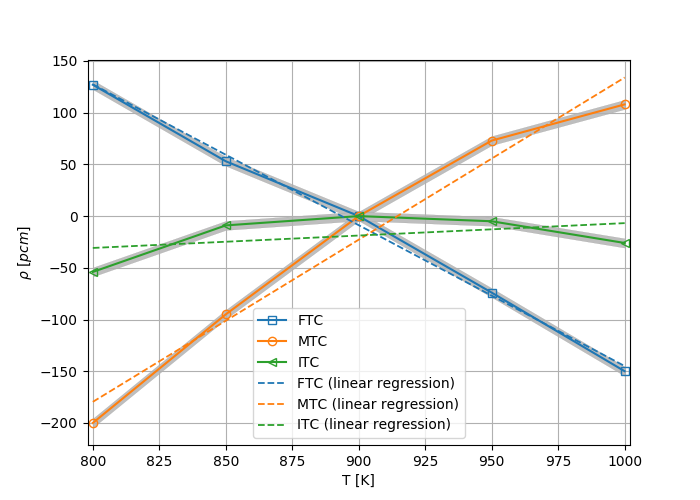

Smoozed TCs: FTC -1.362000 (0.000396); MTC 1.568000 (0.000006); ITC 0.120000 (0.001173) pcm/K

Regression R-squred: FTC 0.996761; MTC 0.969202; ITC 0.186451
Regression STD: FTC 0.044826; MTC: 0.161377; ITC: 0.144720
0.00442197
0.01455950049667444

Control rods worth 1977.300000 +/- 6.438167 pcm, 0.000019 %

Control rods worth 4.471536 +/- 0.014560 $


In [4]:
keff = 1e5*res['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_err = 1e5*res['IMP_KEFF'][:,1]         # K-eff standart deviation

beff = res['FWD_ANA_BETA_ZERO'][-1,0]         # K-eff parsing from dictionary
beff_err = res['FWD_ANA_BETA_ZERO'][-1,1]         # K-eff parsing from dictionary

# T = np.array([800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200])
T = np.array([800, 850, 900, 950, 1000])
fuel_den = 6.105-0.001272*np.asarray(T)
print ('Fuel density', fuel_den, ' for temperature       ', T)

# dT = [80, 80, 80, 20, 20, 20]
print('\nnom ftc800 ftc850 ftc950 ftc1000 ftc1050 ftc1100 ftc1150 ftc1200 mtc800 mtc850 mtc950 mtc1000 mtc1050 mtc1100 mtc1150 mtc1200 itc800 itc850 itc950 itc1000 itc1050 itc1100 itc1150 itc1200 crw0')
print('Multiplication factor', keff)
print('STD for Keff', keff_err*1e5)

# FTC total
ftc_k = []
ftc_k_e = []
for i in [1,2,0,3,4]:
    ftc_k.append(keff[i]-keff[0])
    ftc_k_e.append(keff_err[i])

# MTC total
mtc_k = []
mtc_k_e = []
for i in [5,6,0,7,8]:
    mtc_k.append(keff[i]-keff[0])
    mtc_k_e.append(keff_err[i])
# ITC
itc_k = []
itc_k_e = []
for i in [9,10,0,11,12]:
    itc_k.append(keff[i]-keff[0])
    itc_k_e.append(keff_err[i])

ftc_r = stats.linregress(T, ftc_k)
mtc_r = stats.linregress(T, mtc_k)
itc_r = stats.linregress(T, itc_k)

    
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('T [K]')
ax1.set_ylabel(r'$\rho$ [$pcm$]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
ax1.set_xlim(798,1002)
ax1.plot(T, ftc_k, 's-',label='FTC', markerfacecolor="None")
ax1.plot(T, mtc_k, 'o-', label='MTC', markerfacecolor="None")
ax1.plot(T, itc_k, '<-', label='ITC', markerfacecolor="None")
ax1.set_prop_cycle(color=colors[0:])
ax1.plot(T, ftc_r.intercept + ftc_r.slope * T, '--', linewidth=1.3, label='FTC (linear regression)')
ax1.plot(T, mtc_r.intercept + mtc_r.slope * T, '--', linewidth=1.3, label='MTC (linear regression)')
ax1.plot(T, itc_r.intercept + itc_r.slope * T,  '--',linewidth=1.3, label='ITC (linear regression)')
ax1.fill_between(T, np.asarray(ftc_k)-np.asarray(ftc_k_e), np.asarray(ftc_k)+np.asarray(ftc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(T, np.asarray(mtc_k)-np.asarray(mtc_k_e), np.asarray(mtc_k)+np.asarray(mtc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(T, np.asarray(itc_k)-np.asarray(itc_k_e), np.asarray(itc_k)+np.asarray(itc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=0)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/tc_eol.png',bbox_inches='tight', dpi=700)
#########################################################
ftc = (ftc_k[0] - ftc_k[3]) / (ftc_k[0]*ftc_k[3]*(T[0]-T[3]))
ftc_err = math.sqrt(ftc_k_e[0]**2/ftc_k[0]**4 + ftc_k_e[3]**2/ftc_k[3]**2) * \
            abs(1/(T[0]-T[3]))
#########################################################
mtc = (mtc_k[0] - mtc_k[3]) / (mtc_k[0]*mtc_k[3]*(T[0]-T[3]))
mtc_err = math.sqrt(mtc_k_e[0]**2/mtc_k[0]**4 + mtc_k_e[3]**2/mtc_k[3]**4) * \
            abs(1/(T[0]-T[3]))
########################################################
itc = (itc_k[0] - itc_k[3]) / (itc_k[0]*itc_k[3]*(T[0]-T[3]))
itc_err = math.sqrt(itc_k_e[0]**2/itc_k[0]**4 + itc_k_e[3]**2/itc_k[3]**4) * \
            abs(1/(T[0]-T[3]))


print("Smoozed TCs: FTC %f (%f); MTC %f (%f); ITC %f (%f) pcm/K" %
      (ftc_r.slope, ftc_err,
       mtc_r.slope, mtc_err,
       itc_r.slope, itc_err))
print("\nRegression R-squred: FTC %f; MTC %f; ITC %f" % (ftc_r.rvalue**2, mtc_r.rvalue**2, itc_r.rvalue**2) )
print("Regression STD: FTC %f; MTC: %f; ITC: %f" %(ftc_r.stderr,mtc_r.stderr,itc_r.stderr))

crw = abs(keff[-1] - keff[0])
crw_err = math.sqrt(keff_err[-1]**2 + keff_err[0]**2)
crw_2_err = 1e-5 * abs(1/beff) * math.sqrt(keff_err[-1]**2 + keff_err[0]**2)
print ('\nControl rods worth %f +/- %f pcm, %f %%' %(crw,crw_err, 100*crw/(keff[-1]*keff[0])) )
print ('\nControl rods worth %f +/- %f $' %(1e-5*crw/beff,crw_2_err) )

# Calculations of geometry change

In [ ]:
thermal_exp_zrh = 2.734e-5    # 1/K
thermal_exp_sic = 2.7742e-6   # 1/K

r_0 = 1.15
r_1 = 1.25
h = 150.0
T = np.array([800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300])
T_base = 900
dT = T - T_base
r_0_new = []
r_1_new = []
h_new = []
den_zrh = []
den_sic = []

den_zrh_base = 5.66
V_zrh = h * math.pi * r_0**2
mass_zrh = den_zrh_base * V_zrh

den_sic_base = 3.21
V_sic = h * math.pi * (r_0**2 - r_1**2)
mass_sic = den_sic_base * V_sic


fuel_den = 6.105-0.001272*np.asarray(T)
print("Fuel salt Density, g/cm3", fuel_den)

for t in dT:
    r_0_new.append(r_0*(1 + thermal_exp_zrh*t))
    r_1_new.append((r_1-r_0)*(1 + thermal_exp_sic*t) + r_0*(1 + thermal_exp_zrh*t))
    h_new.append(h*(1 + thermal_exp_zrh*t) )

for i in range(len(T)):
    den_zrh.append(mass_zrh / (h_new[i]*math.pi*r_0_new[i]**2))
    den_sic.append(mass_sic / (h_new[i]*math.pi*(r_0_new[i]**2 - r_1_new[i]**2)))
    print("At %4iK: R of ZrH %4.9f cm, R of SiC %4.9f, cm, height %4.9f cm" %(
            T[i],
            r_0_new[i],
            r_1_new[i],
            h_new[i]  ) )

zrh_den = mass_zrh / (h_new[0]*math.pi*r_0_new[0]**2)
idx = 10
print("\n%% ----- Moderator rod at %4iK" %T[idx])
print("surf 1%i cyl    0.0 0.0 %4.9f" % (T[idx],r_0_new[idx]))
print("surf 2%i cyl    0.0 0.0 %4.9f" % (T[idx],r_1_new[idx]))
print("surf 3%i sqc    0.0 0.0 1.5" % (T[idx]))
print("surf 4%i pz     -%4.9f" % (T[idx],h_new[idx]))
print("surf 5%i pz      %4.9f" % (T[idx],h_new[idx]))
print("cell 1%i  M%i  fill 3 -1%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 2%i  M%i  fill 4 -2%i 1%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 3%i  M%i  fill 2 -3%i 2%i -5%i 4%i" % (T[idx],T[idx],T[idx],T[idx],T[idx],T[idx]))
print("cell 4%i  M%i  fill 2 -3%i -4%i 6" % (T[idx],T[idx],T[idx],T[idx]))
print("cell 5%i  M%i  fill 2 -3%i -7 5%i" % (T[idx],T[idx],T[idx],T[idx]))
print("\n")
for i in range(len(T)):
    print("At %4iK ZrH density  %4.11f g/cm3, SiC density %4.11f g/cm3" % (T[i],den_zrh[i], den_sic[i]))

<IPython.core.display.Javascript object>


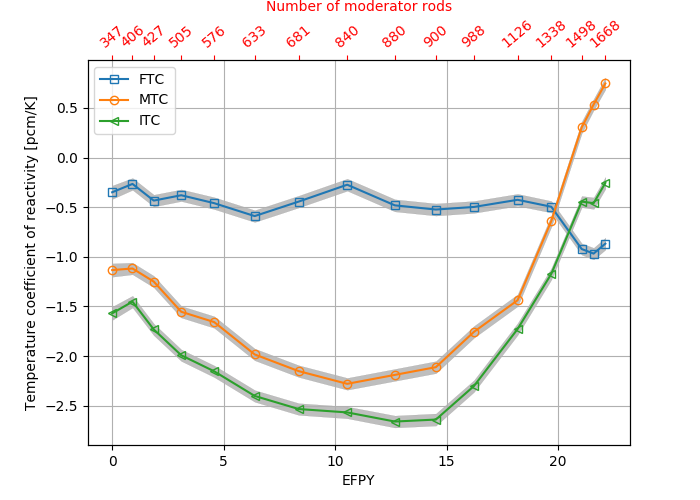

<IPython.core.display.Javascript object>


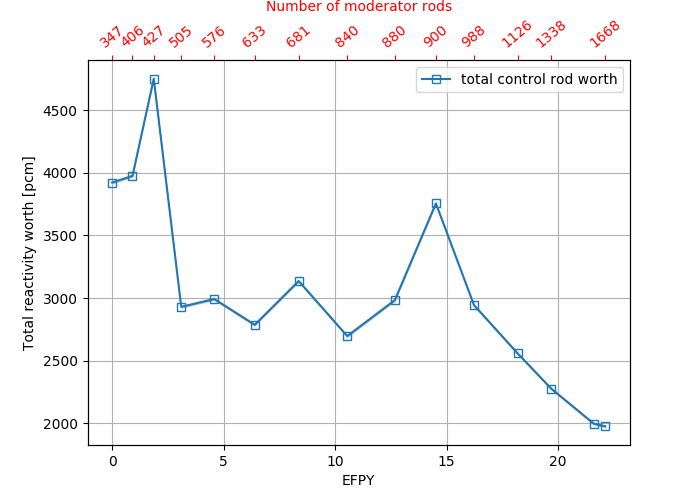

<IPython.core.display.Javascript object>


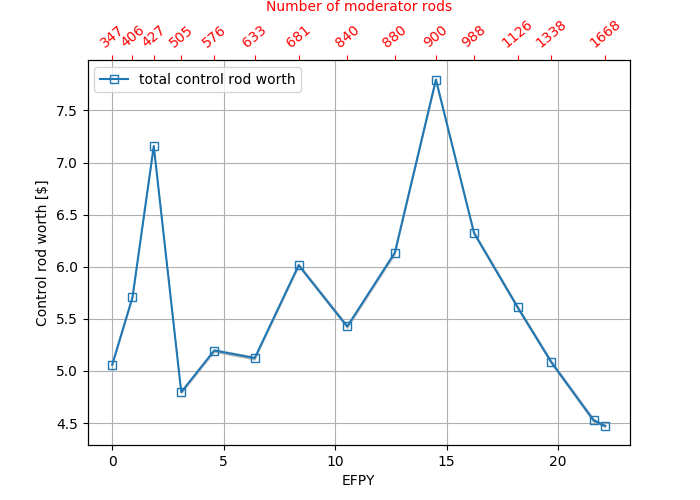

<IPython.core.display.Javascript object>


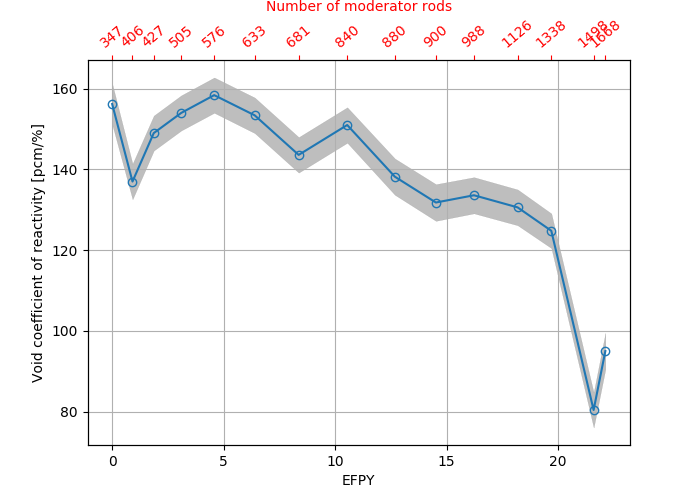

In [6]:
#days_after_startup = np.array([0.0, 5301.0, 7689.0, 9450.0])/365.0
#rods = np.array([333, 900, 1498, 1668])
# pcm/K
#ftc_arr = np.array([-0.350000,-0.524000, -0.922000, -1.683000])
#ftc_arr_e = np.array([0.067387,0.060899, 0.057194, 0.067151])

#mtc_arr = np.array([-1.134000,-2.112000, 0.304000, 3.820600])
#mtc_arr_e = np.array([0.067196,0.060584, 0.056116, 0.069807])

#itc_arr = np.array([-1.570000,-2.640000, -0.444000, 2.289800])
#itc_arr_e = np.array([0.066712,0.060566, 0.056525, 0.069198])

days_after_startup = np.array([0,333,681,1131,1671,
                               2334,3054,3849,4629,5301,5925,6639,
                               7191,7689,7884,8076])/365.0
rods = np.array([347,406,427,505,576,
                 633,681,840,880,900,988,1126,
                 1338,1498,1498,1668])
# CRW pcm
crw = np.array([3922,3975,4750,2930.2,2992.9,
                2787,3136,2697,2984,3755.2,2943.9,2559.2,
                2277,2002,1999.2,1977])
crw_err = np.array([10.8,9.62,9.55,9.48,9.548,
                    9.55,9.62,9.62,9.76,9.83,9.69,9.55,
                    9.27,9.12,9.12,9.27])

crw_d = np.array([5.058713,5.707562,7.158358,4.796545,5.195466,
                5.123275,6.014977,5.426286,6.135167,7.795465,6.323516,5.611149,
                5.083826,4.525460,4.471536])
crw_d_err = np.array([0.013962,0.013814,0.014396,0.015517,0.016575,
                    0.017552,0.018454,0.019357,0.020072,0.020408,0.020814,0.020935,
                    0.020687,0.020625,0.01456])

# Void pcm/void%
void_c = np.array([156.2,137,149,154,158.4,
                   153.4,143.6,151,138.2,131.8,133.6,130.6,
                   124.8,90.8,80.4,95])
void_err = np.array([5.03,4.4,4.33,4.35,4.37,
                     4.4,4.39,4.39,4.49,4.54,4.48,4.43,
                     4.29,4.23,4.33,4.5])

# pcm/K
ftc_arr = np.array([-0.35,-0.266,-0.434,-0.38,-0.46,
                    -0.59,-0.444,-0.274,-0.482,-0.524,-0.498,-0.426,
                    -0.496,-0.922,-0.968,-0.868])
ftc_arr_e = np.array([0.067387,0.0596,0.059210,0.0589,0.0596,
                      0.05919,0.0595,0.06048,0.061,0.060899,0.06,0.06,
                      0.058027,0.057194,0.0582,0.060142])

mtc_arr = np.array([-1.134,-1.118,-1.25,-1.554,-1.658,
                    -1.984,-2.152,-2.28,-2.19,-2.112,-1.756,-1.438,
                    -0.64,0.304,0.534,0.746])
mtc_arr_e = np.array([0.067196,0.05876,0.057912,0.058,0.058327,
                      0.05877,0.059,0.059561,0.06,0.060584,0.059,0.059256,
                      0.057311,0.058363,0.056116,0.060178])

itc_arr = np.array([-1.57,-1.452,-1.732,-1.992,-2.154,
                    -2.402,-2.534,-2.568,-2.66,-2.640000,-2.302,-1.728,
                    -1.172000,-0.444000,-0.46,-0.256000])
itc_arr_e = np.array([0.066712,0.0592,0.058354,0.058,0.058313,
                      0.0587,0.059,0.059104,0.06,0.060566,0.059325,0.059243,
                      0.057738,0.056525,0.057881,0.059685])


# Plot here
fig_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax1 = fig_2.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('EFPD')
ax1.set_xlabel('EFPY')
ax1.set_ylabel(r'Temperature coefficient of reactivity [pcm/K]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
#ax1.set_xlim(798,1002)
ax1.plot(days_after_startup, ftc_arr, 's-',label='FTC', markerfacecolor="None")
ax1.plot(days_after_startup, mtc_arr, 'o-', label='MTC', markerfacecolor="None")
ax1.plot(days_after_startup, itc_arr, '<-', label='ITC', markerfacecolor="None")
ax1.fill_between(days_after_startup, ftc_arr-ftc_arr_e, ftc_arr+ftc_arr_e, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(days_after_startup, mtc_arr-mtc_arr_e, mtc_arr+mtc_arr_e, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(days_after_startup, itc_arr-itc_arr_e, itc_arr+itc_arr_e, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=0)


ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.delete(days_after_startup, -2))
ax2.set_xticklabels(np.delete(rods, -2), rotation=40)
ax2.set_xlabel(r"Number of moderator rods", color='r')
ax2.tick_params(axis='x', colors='red')

fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/tc_evo.png',bbox_inches='tight', dpi=700)


del_arr = 13
days_after_startup = np.delete(days_after_startup, del_arr, 0)
rods = np.delete(rods, del_arr, 0)
crw = np.delete(crw, del_arr, 0)
crw_err = np.delete(crw_err, del_arr, 0)
# Plot here
fig_3 = matplotlib.pyplot.figure(3, figsize=[7,5])
ax1 = fig_3.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('EFPY')
ax1.set_ylabel(r'Total reactivity worth [pcm]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
#ax1.set_xlim(798,1002)
ax1.plot(days_after_startup, crw, 's-',label='total control rod worth', markerfacecolor="None")
ax1.fill_between(days_after_startup, crw-crw_err, crw+crw_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=0)

ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.delete(days_after_startup, -2))
ax2.set_xticklabels(np.delete(rods, -2), rotation=40)
ax2.set_xlabel(r"Number of moderator rods", color='r')
ax2.tick_params(axis='x', colors='red')

fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/crw_evo.png',bbox_inches='tight', dpi=700)

# Plot here
fig_32 = matplotlib.pyplot.figure(4, figsize=[7,5])
ax1 = fig_32.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('EFPY')
ax1.set_ylabel(r'Control rod worth [$]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
#ax1.set_xlim(798,1002)
ax1.plot(days_after_startup, crw_d, 's-',label='total control rod worth', markerfacecolor="None")
ax1.fill_between(days_after_startup, crw_d-crw_d_err, crw_d+crw_d_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=0)

ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.delete(days_after_startup, -2))
ax2.set_xticklabels(np.delete(rods, -2), rotation=40)
ax2.set_xlabel(r"Number of moderator rods", color='r')
ax2.tick_params(axis='x', colors='red')

fig_32.show()
#fig_32.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/crw_evo_dollar.png',bbox_inches='tight', dpi=700)


void_c = np.delete(void_c, del_arr, 0)
void_err = np.delete(void_err, del_arr, 0)
# Plot here
fig_4 = matplotlib.pyplot.figure(5, figsize=[7,5])
ax1 = fig_4.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('EFPY')
ax1.set_ylabel(r'Void coefficient of reactivity [pcm/%]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
#ax1.set_xlim(798,1002)
ax1.plot(days_after_startup, void_c, 'o-',label='void coefficient', markerfacecolor="None")
ax1.fill_between(days_after_startup, void_c-void_err, void_c+void_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax1.legend(loc=0)

ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(days_after_startup)
ax2.set_xticklabels(rods, rotation=40)
ax2.set_xlabel(r"Number of moderator rods", color='r')
ax2.tick_params(axis='x', colors='red')

fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/void_evo.png',bbox_inches='tight', dpi=700)

# Void coefficient

In [ ]:
rho_salt = 4.9602  # g/cc
rho_he = 5.26e-5   # g/cc at T=900K
# void_percent = 0.011867/100  # fraction of 0.011867% see above
# void_percent = 0.2/100  # fraction of 0.2% see above
# void_percent = 0.5/100  # fraction of 0.5% see above
# void_percent = 1.0/100  # fraction of 0.1% see above
void_percent = np.linspace(0, 2, 5)


#void_percent = np.arange(0, 1.1, 0.1)/100
print('Void %', void_percent)
rho_mix = (1-(1/100)*void_percent)*rho_salt + (1/100)*void_percent * rho_he

print("Density of the salt+He bubbles [g/cm3]", rho_mix)
# print("2004.09c -%.14e" %(rho_he*void_percent/rho_salt))

In [ ]:
void_k = []
void_k_e = []
void_k_eol = []
void_k_e_eol = []


res_eol = serpent.parse_res('../../../safety_analysis/tap/1498rods/eoc/tap_safety_param_kl100_res.m', write_py=False)
keff_eol = 1e5*res_eol['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_err_eol = 1e5*res_eol['IMP_KEFF'][:,1]         # K-eff standart deviation

for i in [0, 13, 14, 15, 16]:
    void_k.append(keff[i]-keff[0])
    void_k_e.append(keff_err[i])
    void_k_eol.append(keff_eol[i]-keff_eol[0])
    void_k_e_eol.append(keff_err_eol[i])
    
    
print(void_k)
print(void_k_e)
print(void_percent)

av_r = stats.linregress(void_percent, void_k)
print(av_r)

# Initialize figure
fig_7 = matplotlib.pyplot.figure(6)
ax = fig_7.add_subplot(111)
ax.grid(True)
ax.plot(void_percent, void_k, 'o-', linewidth=1.5, markerfacecolor="None", label=r'BOL')
ax.plot(void_percent, void_k_eol, 's-', linewidth=1.5, markerfacecolor="None", label=r'EOL')
#ax.plot(void_percent, av_r.intercept + av_r.slope * void_percent, '--', label=r'linear regression')
ax.fill_between(void_percent, np.asarray(void_k)-np.asarray(void_k_e), np.asarray(void_k)+np.asarray(void_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(void_percent, np.asarray(void_k_eol)-np.asarray(void_k_e_eol), np.asarray(void_k_eol)+np.asarray(void_k_e_eol), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.set_ylabel(r'$\Delta \rho$ [$pcm$]')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax.set_xlabel(r'He volume fraction [%]')
ax.set_xlim(-0.01, 2.01)
#ax.set_ylim(1.036, 1.038)
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.legend(loc=0)
fig_7.show()
#fig_7.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/void_coeff_bol_eol.png',bbox_inches='tight', dpi=700)
sim_a_v = 1e5*(void_k[-1]-void_k[0])/(void_percent[-1]-void_percent[0])
sim_a_v_std = 1e+5*math.sqrt(void_k_e[0]**2/void_k[0]**4 + void_k_e[-1]**2/void_k[-1]**4) * \
            abs(1/(void_percent[-1]-void_percent[0]))

print(r'From Serpent $\alpha_v$ = %.2f +/- %.2f pcm/void%%' %(sim_a_v, sim_a_v_std))
print(r'Smoothed using linear regression $\alpha_v$ = %f pcm/void%%' %(1e5*av_r.slope))